## Введение

У маркетингового отдела крупного интернет-магазина имеются гипотезы для увеличения выручки. А также результаты А/В-теста - данные о заказах и пользователях по дням и группам тестрирования.

**План работы:** 
* приоритизировать гипотезы, используя фреймворки ICE и RICE
* проанализировать результаты А/В-теста (будем использовать точечные диаграммы, графики и статистический методы для проверки гипотез - расчет перцентилей и U-критерий Манна-Уитни)



## Приоритизация гипотез

In [2]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Фреймворк **ICE** использует следующие параметры для приоритизации гипотез:
* Impact - насколько сильно изменение повлияет на пользователя, их опыт и удовлетворенность от продукта.
* Confidence - насколько мы уверены, что изменение повлияет на пользователей именно так.
* Efforts - сколько стоит протестировать данную гипотезу.

Фреймворк **RICE** использует все эти же параметры, но также добавляется следующая оценка:
* Reach - скольких пользователей затронет предложенное изменение.

In [ ]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [ ]:
hypothesis['RICE'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


In [ ]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

При приоритизации гипотез во фреймворках ICE и RICE мы видим существенную разницу в лидирующих гипотезах. Это происходит из-за разницы учитываемых параметров.

RICE, кроме прочего, учитывает параметр Reach - количество пользователей, на которых изменение окажет влияние. Поэтому при его применении на первое место выходят гипотезы с наибольшим охватом пользователей - "Добавить форму подписки", "Добавить блоки рекомендаций" и "Добавить 2 новых канала привлечения трафика"

## Анализ А/В-теста

### Подготовка данных для анализа

In [ ]:
# Прочитаем данные
orders = pd.read_csv('/datasets/orders.csv')
orders.info()
display(orders.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()
display(visitors.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [ ]:
# Приведем время к типу datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [ ]:
# Проверим полученные таблицы на дубликаты
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


In [ ]:
# Проверим на пропуски
print(orders.isna().sum())
print(visitors.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


In [ ]:
# Проверим количество групп
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [ ]:
# Посмотрим даты начала и окончания теста
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [ ]:
# Проверим, что есть ли пользователи, попавшие в обе групы и сколько их.
(orders.groupby('visitorId')
       .agg({'group':'nunique'})
       .sort_values(by='group', ascending=False)
       .query('group > 1')
       .count())

group    58
dtype: int64

In [ ]:
# Всего пользователей
visitors['visitors'].sum()

37652

Оказалось, что имеется 58 пользователей, попавших в обе группы. Одни и те же пользователи попали в две группы теста - это говорит об ошибке в сборе данных. Удаление этих пользователей повлияет на конверсию, поскольку мы можем удалить этих пользователей из таблицы с заказами, но не сможем удалить из таблицы с визитами, поскольку там данные уже агрегированы за день.

In [ ]:
# Соберем массив уникальных пар значений даты и группы
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head(10)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B
85,2019-08-22,B
86,2019-08-22,A
124,2019-08-17,A
125,2019-08-17,B


In [ ]:
# Посчитаем кумулятивные данные о заказах по дням
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                          .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}),
                           axis=1)
                    .sort_values(by=['date','group']))
    
ordersAggregated.head(10)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


In [ ]:
# Посчитаем кумулятивные данные о посетителях по дням
visitorsAggregated = (datesGroups
                    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                          .agg({'date':'max', 'group':'max', 'visitors':'sum'}),
                           axis=1)
                    .sort_values(by=['date','group']))
    
visitorsAggregated.head(10)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


In [ ]:
# Объединим все кумулятивные данные по дням и группам в одну таблицу
# Получим таблицу с кумулятивными данными по количеству заказов, количеству покупателей, выручке и количеству посетителей
cumData = ordersAggregated.merge(visitorsAggregated, on=['date','group'])
cumData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Добавим столбец со средним чеком
cumData['avgRevenue'] = cumData['revenue'] / cumData['orders']
cumData['avgOrders'] = cumData['orders'] / cumData['visitors']
cumData.head()

,date,group,orders,buyers,revenue,visitors,avgRevenue,avgOrders
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,38,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,62,354874,1845,5218.735294,0.036856


In [ ]:
# Подготовим отдельные таблицы по группам с данными о кумулятивной выручке, среднем чеке и 
# среднем количестве заказов на посетителя.
cumDataA = cumData.query('group == "A"')[['date', 'revenue', 'avgRevenue', 'avgOrders']]
cumDataB = cumData.query('group == "B"')[['date', 'revenue', 'avgRevenue', 'avgOrders']]

display(cumDataA.head())
display(cumDataB.head())

,date,revenue,avgRevenue,avgOrders
0,2019-08-01,148579,6190.791667,0.033380
2,2019-08-02,242401,5509.113636,0.032885
4,2019-08-03,354874,5218.735294,0.036856
6,2019-08-04,425699,5067.845238,0.032787
8,2019-08-05,549917,5045.110092,0.032851


,date,revenue,avgRevenue,avgOrders
1,2019-08-01,101217,4819.857143,0.029453
3,2019-08-02,266748,5927.733333,0.034776
5,2019-08-03,380996,6245.836066,0.033833
7,2019-08-04,489567,6276.500000,0.030315
9,2019-08-05,581995,5762.326733,0.030793


In [ ]:
# Подготовим таблицу для пострения графиков относительных изменений.
mergedCumData = cumDataA.merge(cumDataB, on='date', suffixes=['A', 'B'])
mergedCumData.head()

,date,revenueA,avgRevenueA,avgOrdersA,revenueB,avgRevenueB,avgOrdersB
0,2019-08-01,148579,6190.791667,0.033380,101217,4819.857143,0.029453
1,2019-08-02,242401,5509.113636,0.032885,266748,5927.733333,0.034776
2,2019-08-03,354874,5218.735294,0.036856,380996,6245.836066,0.033833
3,2019-08-04,425699,5067.845238,0.032787,489567,6276.500000,0.030315
4,2019-08-05,549917,5045.110092,0.032851,581995,5762.326733,0.030793


### График кумулятивной выручки по группам

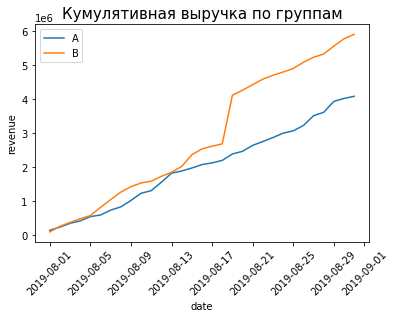

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.plot(cumDataA['date'], cumDataA['revenue'], label='A')
plt.plot(cumDataB['date'], cumDataB['revenue'], label='B')
plt.legend()
plt.xlabel('date')
plt.ylabel('revenue')
plt.title('Кумулятивная выручка по группам', fontsize=15)
plt.xticks(rotation=45)
plt.figure(figsize=(15, 10))
plt.show()

Выручка в обеих группах растет в течение всего теста. Примерно в середине теста выручка группы В превысила выручку группы А и продолжает лидировать. Возможно, в этот день были какие-то крупные заказы.

### График кумулятивного среднего чека по группам

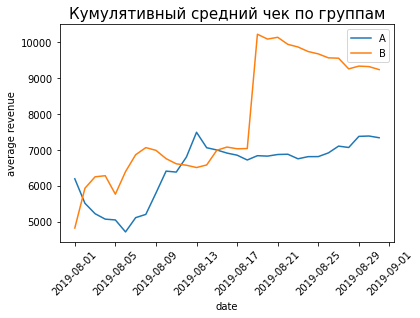

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.plot(cumDataA['date'], cumDataA['avgRevenue'], label='A')
plt.plot(cumDataB['date'], cumDataB['avgRevenue'], label='B')
plt.legend()
plt.xlabel('date')
plt.ylabel('average revenue')
plt.title('Кумулятивный средний чек по группам', fontsize=15)
plt.xticks(rotation=45)
plt.figure(figsize=(15, 10))
plt.show()

По среднему чеку также лидирует группа В. В начале теста видно, что средний чек в группе А сильно упал, но затем восстановился и дальше все более-менее стабильно. В группе В произошел сильный скачок в росте примерно в середине теста, что соответствует графику выручки, затем средний чек этой группы начал плавное снижение. Также как и в предыдущем графике предположу какой-то крупный заказ в этот день.

### График относительного изменения кумулятивного среднего чека группы В к группе А

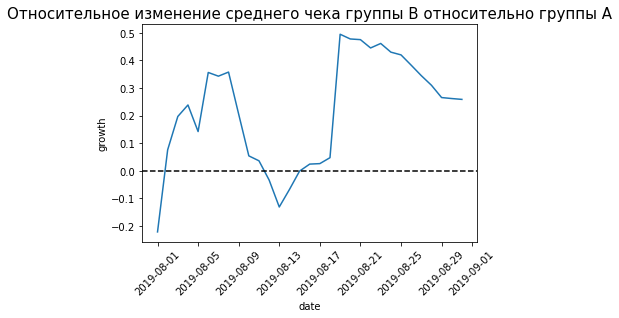

In [ ]:
plt.plot(mergedCumData['date'], mergedCumData['avgRevenueB'] / mergedCumData['avgRevenueA'] - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('date')
plt.ylabel('growth')
plt.title('Относительное изменение среднего чека группы В относительно группы А', fontsize=15)
plt.xticks(rotation=45)
plt.show()

Средний чек в группе В почти везде выше чем в группе А. На графике видны сильные скачки в нескольки точках, еще раз убедимся в наличии каких-то аномалий в эти дни, крупных заказов.

### График кумулятивного среднего количества заказов на посетителя по группам

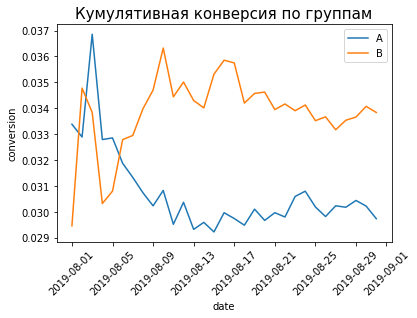

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.plot(cumDataA['date'], cumDataA['avgOrders'], label='A')
plt.plot(cumDataB['date'], cumDataB['avgOrders'], label='B')
plt.legend()
plt.xlabel('date')
plt.ylabel('conversion')
plt.title('Кумулятивная конверсия по группам', fontsize=15)
plt.xticks(rotation=45)
plt.figure(figsize=(15, 10))
plt.show()

Кумулятивное среднее количество заказов на посетителя соответствует конверсии. На графике видно, что в начале теста конверсия группы А превышала конверсию гуппы В, но затем конверсия группы В выросла и далее лидирует в течение оставшегося теста.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А

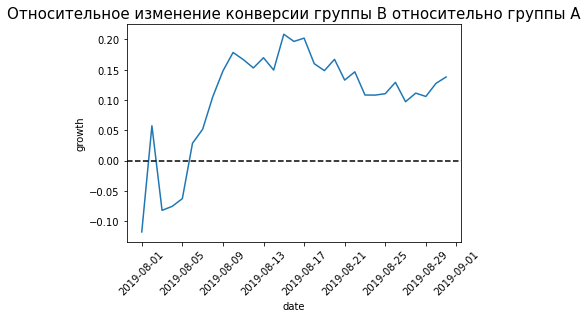

In [ ]:
plt.plot(mergedCumData['date'], mergedCumData['avgOrdersB'] / mergedCumData['avgOrdersA'] - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('date')
plt.ylabel('growth')
plt.title('Относительное изменение конверсии группы В относительно группы А', fontsize=15)
plt.xticks(rotation=45)
plt.show()

На графике видно, что по конверсия группы В устойчиво превышает конверсию группы А.

### График количества заказов по пользователям

In [ ]:
# Подготовим данные для построения графика
ordersByUsers = (orders.groupby(['visitorId'], as_index=False)
                       .agg({'transactionId':'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.head(10)

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
5,47206413,1
6,48147722,1
7,54447517,1
8,56960363,1
9,66685450,1


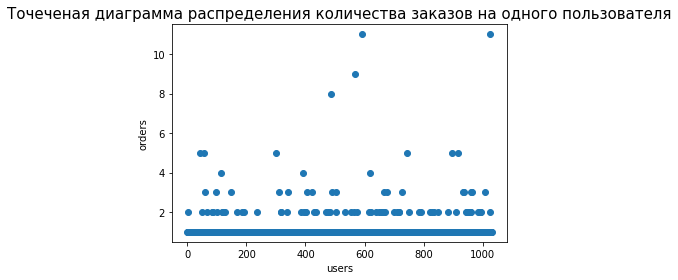

In [ ]:
# Построим точеченую диаграмму
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('users')
plt.ylabel('orders')
plt.title('Точеченая диаграмма распределения количества заказов на одного пользователя', fontsize=15)
plt.show()

Большинство пользователей с 1-2 заказами, также имеется некоторое количество пользователей с 3-4 заказами. Больше 4 заказов у одного пользователя встречается редко.

### Расчет перцентилей по количеству заказов на пользователя

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

5% пользователей имеют больше 2-х заказов и 1 % пользователей с 4-мя и более заказами.
Выберем 2 заказа на пользователя в качестве верхней границы, а остальных отсеем.

In [ ]:
max_orders = round(np.percentile(ordersByUsers['orders'], 95))

### График стоимостей заказов

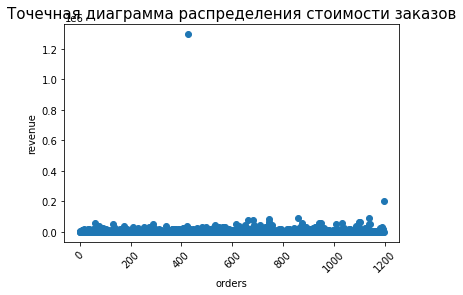

In [ ]:
# Построим точеченую диаграмму
x_values = pd.Series(range(0, len(orders['transactionId'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('orders')
plt.ylabel('revenue')
plt.title('Точечная диаграмма распределения стоимости заказов', fontsize=15)
plt.xticks(rotation=45)
plt.show()

На графике видно, что есть несколько очень дорогих заказов. Но основная масса заказов находится до 10000.

### Расчет перцентилей по стоимости заказов

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

5% заказов дороже 28000 и всего 1% дороже 58233,2. В качестве верхней границе для нормальных заказов возьмем 28000.

In [ ]:
max_order_revenue = round(np.percentile(orders['revenue'], 95))


### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным

Для проверки статистической значимости сформулируем гипотезы.

**Н0**: различий в среднем числе заказов между группами нет.

**Н1**: различий между группами есть.

Зададим **уровень значимости** 0,05.

In [ ]:
# Сначала подготовим данные для анализа.
ordersByUsersA = (orders.query('group == "A"')
                        .groupby('visitorId', as_index=False)
                        .agg({'transactionId':'nunique'}))
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = (orders.query('group == "B"')
                        .groupby('visitorId', as_index=False)
                        .agg({'transactionId':'nunique'}))
ordersByUsersB.columns = ['visitorId', 'orders']

display(ordersByUsersA.head())
display(ordersByUsersB.head())

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [ ]:
# Создадим выборки с количестовм заказов для всех пользователей, пользователям, которые ничего не заказали поставим 0.
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(visitorsAggregated.query('group == "A"')['visitors'].sum() - 
                                                 len(ordersByUsersA['orders'])),
                              name = 'orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visitorsAggregated.query('group == "B"')['visitors'].sum() - 
                                                 len(ordersByUsersB['orders'])),
                              name = 'orders')], axis=0)

In [ ]:
# Применим U-критерий Манна-Уитни
print('p_value: {0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))

p_value: 0.015


p-value  меньше заданного уровня значимости, отвергаем нулевую гипотезу. У нас есть основания считать, что между группами есть статистически значимое различие.

In [ ]:
# Посмотрим как отличаются между собой средние количества заказов.
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.144


Количество заказов в группе В на "сырых" данных больше, чем в группе А на 14,4%.

### Статистическая значимость различий в среднем чеке заказа между группами по "сырым" данным


Для проверки статистической значимости сформулируем гипотезы.

**Н0**: различий в среднем чеке между группами нет.

**Н1**: различий между группами есть.

Зададим **уровень значимости** 0,05.

In [ ]:
# Применим U-критерий Манна-Уитни
print('p_value: {0:.3f}'.format(st.mannwhitneyu(orders.query('group == "A"')['revenue'],  
                                                orders.query('group == "B"')['revenue'])[1]))

p_value: 0.729


p_value значительно больше заданного уровня значимости, причин отвергать нулевую гипотезу и считать, что между группами есть статистически значимые различия, нет.

In [ ]:
# Посмотрим как отличаются между собой сами средние.
print('{0:.3f}'.format(orders.query('group == "B"')['revenue'].mean() / 
                                orders.query('group == "A"')['revenue'].mean() - 1))

0.259


При этом различие в средних чеках между группами значительное - средний чек группы В превышает средний чек группы А на 25,9%.
Похоже, аномальные большие заказы оказывают тут влияние.

### Статистическая значимость различий в среднем количестве заказов на посетителя по "очищенным" данным

Для проверки статистической значимости сформулируем гипотезы.

**Н0**: различий в среднем числе заказов между группами нет.

**Н1**: различий между группами есть.

Зададим **уровень значимости** 0,05.

In [ ]:
# Сначала составим массив с id аномальных пользоватиелей.
# Аномальными считаем пользователей с количеством заказов больше 2 и стоимостью заказов больше 28000.
usersWithManyOrders = pd.concat([ordersByUsersA.query('orders > @max_orders')['visitorId'],
                                 ordersByUsersB.query('orders > @max_orders')['visitorId']], 
                               axis=0)
usersWithExpensiveOrders = orders.query('revenue > @max_order_revenue')['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
                .drop_duplicates()
                .sort_values())
len(abnormalUsers)

74

In [ ]:
# Исключим аномальных пользователей из данных.
sampleAFilt = pd.concat([ordersByUsersA.query('visitorId not in @abnormalUsers')['orders'],
                         pd.Series(0, index=np.arange(visitorsAggregated.query('group == "A"')['visitors'].sum() - 
                                                 len(ordersByUsersA['orders'])),
                              name = 'orders')], axis=0)
sampleBFilt = pd.concat([ordersByUsersB.query('visitorId not in @abnormalUsers')['orders'],
                         pd.Series(0, index=np.arange(visitorsAggregated.query('group == "B"')['visitors'].sum() - 
                                                 len(ordersByUsersB['orders'])),
                              name = 'orders')], axis=0)



In [ ]:
# Применим U-критерий Манна-Уитни
print('p_value: {0:.3f}'.format(st.mannwhitneyu(sampleAFilt, sampleBFilt)[1]))

p_value: 0.011


p-value меньше уровня значимости, значит у нас есть основания отклонить нулевую гипотезу. Различия между группами есть, и оно статистически значимо. Результат на "очищенных" данных совпадает с результатом на "сырых" данных.

In [ ]:
# Посмотрим как отличаются между собой средние количества заказов на "очищенных" данных.
print('{0:.3f}'.format(sampleBFilt.mean() / sampleAFilt.mean() - 1))

0.178


Разница между группами увеличилась - среднее количество заказов на пользователя в группе В превышает среднее количество заказов в группе А. Похоже, что некоторое количество пользователей с большим количеством заказов были в группе А до очищения данных.

### Статистическая значимость различий в среднем чеке заказа между группами по "очищенным" данным

Для проверки статистической значимости сформулируем гипотезы.

**Н0**: различий в среднем чеке между группами нет.

**Н1**: различий между группами есть.

Зададим **уровень значимости** 0,05.

In [ ]:
# Применим U-критерий Манна-Уитни
print('p_value: {0:.3f}'.format(st.mannwhitneyu(orders.query('group == "A" & visitorId not in @abnormalUsers')['revenue'],  
                                                orders.query('group == "B" & visitorId not in @abnormalUsers')['revenue'])[1]))

p_value: 0.738


p_value больше уровня значимости, оснований отвергнуть нулевую гипотезу нет. Между группам А и В нет статистически значимых различий. Результат на "очищенных" данных совпадает с результатом на "сырых" данных.

In [ ]:
# Посмотрим как отличаются между собой сами средние на "очищенных" данных.
print('{0:.3f}'.format(orders.query('group == "B" & visitorId not in @abnormalUsers')['revenue'].mean() / 
                                orders.query('group == "A" & visitorId not in @abnormalUsers')['revenue'].mean() - 1))

-0.020


Средний чеки обеих групп после удаления аномальных заказов отличаются всего на 2%.

### Результаты теста

* Есть статистически значимые различия среднего количества заказов по группам как по "сырым", так и по "очищенным" данным.
* Нет статистически значимых различий по среднему чеку по группам как по "сырым", так и по "очищенным" данным.
* На графике различия конверсий видно, что результаты группы В лучше группы А.
* График различия среднего чека показывает наличие аномалий.


**Вывод:**

Конверсия в группе В лучше конверсии группы А, но не видно различий в среднем чеке. По всей видимости, пользователи группы В стали делать больше заказов по сравнению с группой А, но эти заказы на меньшие суммы. Поэтому и нет различий в средних чеках по группам. Выручка не увеличивается. Мне кажется логичным решением в такой ситуации остановить тест, зафиксировать отсутствие различий между группами и перейти к проверке следующей гипотезы.